In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lzma
import pickle

from matplotlib.lines import Line2D

In [2]:
load_Dir = "../Data/"

In [3]:
file_name = "DF_logZ_SI.xz"
with lzma.open(load_Dir + file_name, "rb") as f:
    data_frame = pickle.load(f)
data_frame[r"$\rho$"] = data_frame["M"]
data_frame[r"$\delta$"] = data_frame["S"]

In [6]:
sns.set_theme(style="whitegrid",font_scale=1.3)

<Axes: xlabel='$\\kappa$', ylabel='$\\frac{1}{N}\\log Z$'>

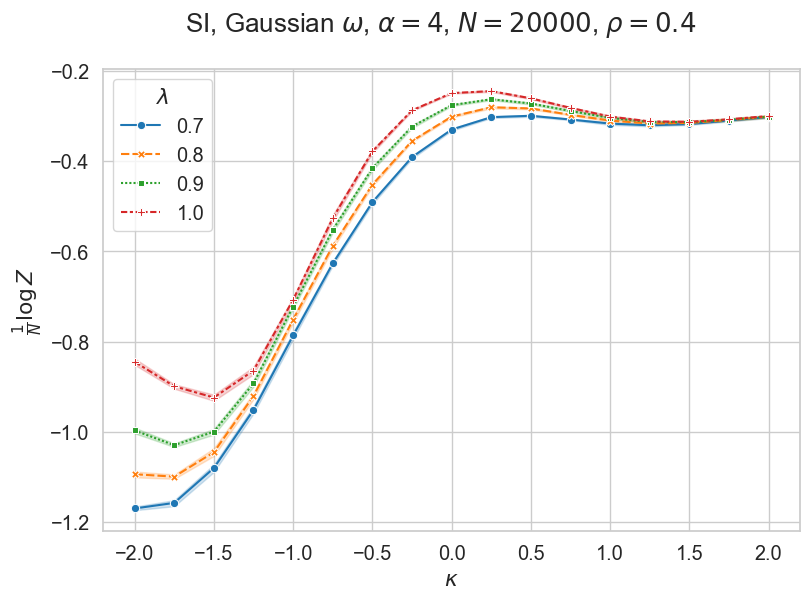

In [7]:
df = data_frame.copy()
df[r"$\kappa$"] = -df["c"]
df[r"$\frac{1}{N}\log Z$"] = df["total_free_entropy"]
df_SI = df

#df_1 = df[(df[r"$\rho$"]==1) & (df[r"$\lambda$"]==1)]
#kappa_list = df_1[r"$\kappa$"].unique()
#kappa_list = np.sort(kappa_list)
#Z_SI_list = np.zeros(len(kappa_list))
#for i,kappa in enumerate(kappa_list):
#    Z_SI_list[i] = df_1[df_1[r"$\kappa$"]==kappa][r"$\frac{1}{N}\log Z$"].mean()

fig,ax = plt.subplots(1, 1, figsize=(9,6))
fig.suptitle(f"SI, Gaussian $\omega$, $\\alpha=4$, $N=20000$, $\\rho=0.4$")
sns.lineplot(data=df[df[r"$\rho$"]==0.4], x=r"$\kappa$", y=r"$\frac{1}{N}\log Z$", hue=r"$\lambda$", markers=True, errorbar=("ci", 99), style=r"$\lambda$", palette="tab10")
#plt.plot(kappa_list,Z_SI_list, color="black", linestyle="--", label=r"$\phi_{\rm info}$")

#### dSIR

In [8]:
file_name = "DF_20250502-172723_798.xz"
with lzma.open(load_Dir + file_name, "rb") as f:
    data_frame = pickle.load(f)
data_frame[r"$\rho$"] = data_frame["M"]
data_frame[r"$\delta$"] = data_frame["S"]

<Axes: xlabel='$\\kappa$', ylabel='$\\frac{1}{N}\\log Z$'>

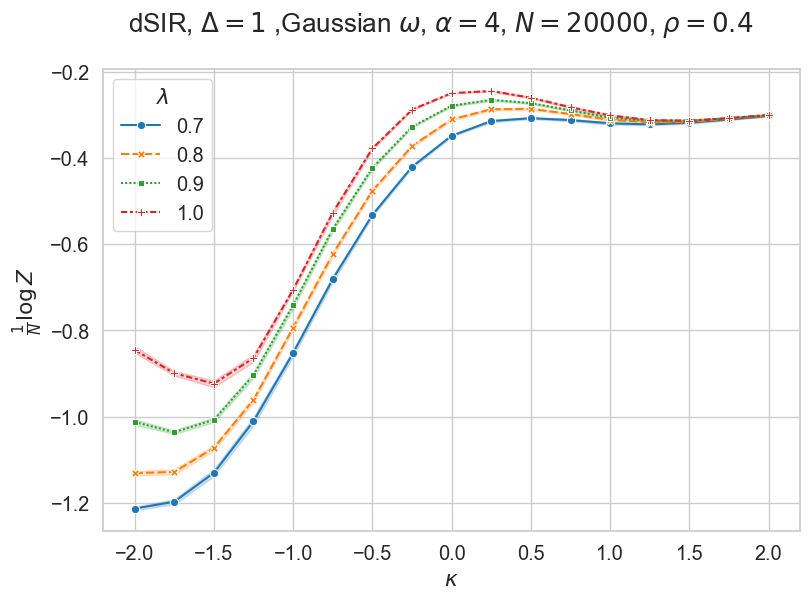

In [10]:
df = data_frame.copy()
df[r"$\kappa$"] = -df["c"]
df[r"$\frac{1}{N}\log Z$"] = df["total_free_entropy"]

df_SIR = df.copy()

#plot
fig,ax = plt.subplots(1, 1, figsize=(9,6))
fig.suptitle(f"dSIR, $\Delta=1$ ,Gaussian $\omega$, $\\alpha=4$, $N=20000$, $\\rho=0.4$")
sns.lineplot(data=df[df[r"$\rho$"]==0.4], x=r"$\kappa$", y=r"$\frac{1}{N}\log Z$", hue=r"$\lambda$", markers=True, errorbar=("ci", 99), style=r"$\lambda$", palette="tab10")


#### SI, rho

In [12]:
file_name = "DF_20250502-171223_216.xz"
with lzma.open(load_Dir + file_name, "rb") as f:
    data_frame = pickle.load(f)
data_frame[r"$\rho$"] = round(data_frame["M"],1)
data_frame[r"$\delta$"] = data_frame["S"]

<Axes: xlabel='$\\kappa$', ylabel='$\\frac{1}{N}\\log Z$'>

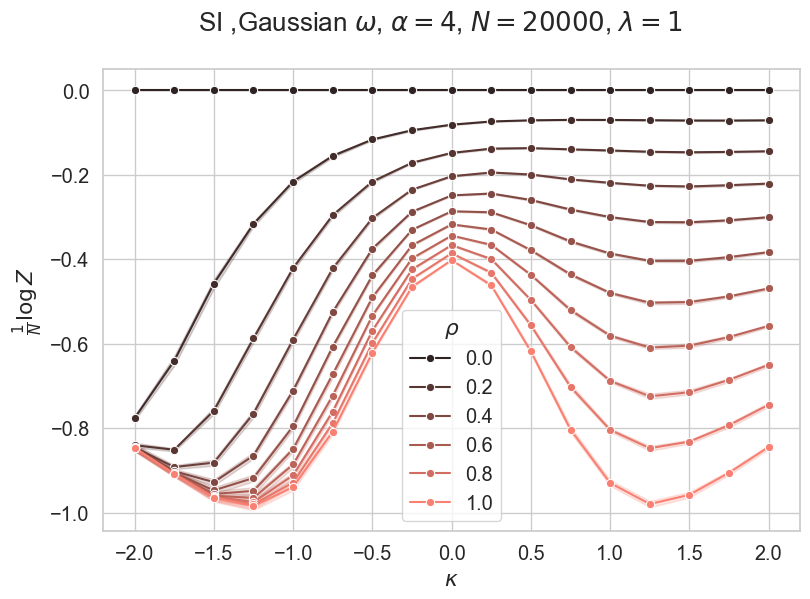

In [13]:
df = data_frame.copy()
df[r"$\kappa$"] = -df["c"]
df[r"$\frac{1}{N}\log Z$"] = df["total_free_entropy"]

df_SI2 = df.copy()

#plot
fig,ax = plt.subplots(1, 1, figsize=(9,6))
fig.suptitle(f"SI ,Gaussian $\omega$, $\\alpha=4$, $N=20000$, $\\lambda=1$")
sns.lineplot(data=df, x=r"$\kappa$", y=r"$\frac{1}{N}\log Z$", hue=r"$\rho$", marker="o", errorbar=("ci", 99), palette="dark:salmon")


#### Together

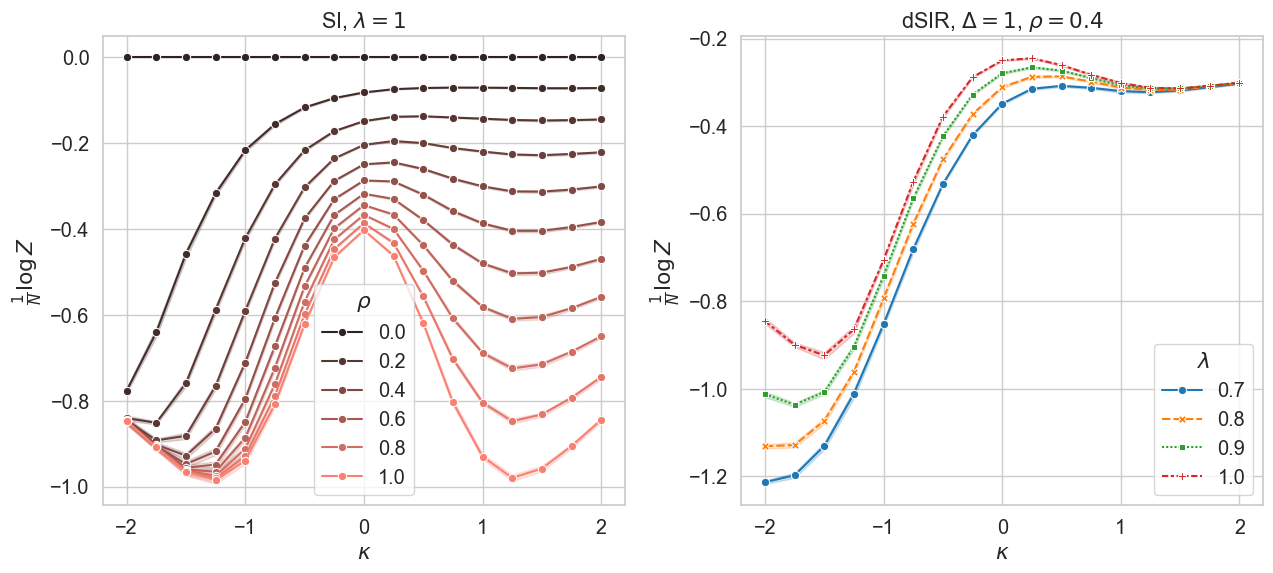

In [14]:
# put the two previous plots side by side

fig, axs = plt.subplots(1, 2, figsize=(13,6))
#fig.suptitle(f"Gaussian $\omega$, $N=20000$")

sns.lineplot(data=df_SI2, x=r"$\kappa$", y=r"$\frac{1}{N}\log Z$", hue=r"$\rho$", marker="o", errorbar=("ci", 99), palette="dark:salmon", ax=axs[0])
sns.lineplot(data=df_SIR[df_SIR[r"$\rho$"]==0.4], x=r"$\kappa$", y=r"$\frac{1}{N}\log Z$", hue=r"$\lambda$", markers=True, errorbar=("ci", 99), style=r"$\lambda$", palette="tab10", ax=axs[1])

axs[0].set_title(r"SI, $\lambda=1$")
axs[1].set_title(r"dSIR, $\Delta=1$, $\rho=0.4$")
axs[1].legend(title=r"$\lambda$",loc="lower right")
plt.tight_layout()

fig.savefig(f"../Plots/Figure7.pdf")
